## Preprocessing

In [2]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Deep Learning!
import tensorflow as tf

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
# Import pandas and read the charity_data.csv from the provided cloud URL.
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [7]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = df.drop(columns=["EIN", "NAME"])

In [5]:
# Determine the number of unique values in each column.
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is string-based
        print(col)
        print(df[col].nunique())

NAME
19568
APPLICATION_TYPE
17
AFFILIATION
6
CLASSIFICATION
71
USE_CASE
5
ORGANIZATION
4
INCOME_AMT
9
SPECIAL_CONSIDERATIONS
2


<Axes: xlabel='NAME'>

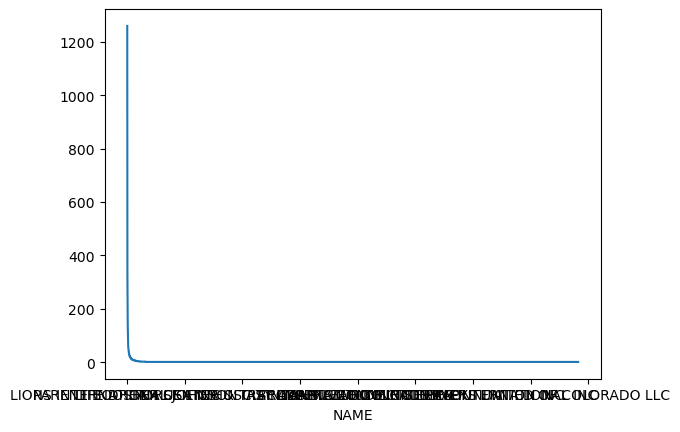

In [6]:
df.NAME.value_counts().plot()

In [8]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
df.APPLICATION_TYPE.value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [10]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff = 500

temp = df.APPLICATION_TYPE.value_counts()
application_types_to_replace = list(temp.loc[temp < cutoff].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
df['APPLICATION_TYPE'].value_counts()

NameError: name 'application_df' is not defined

In [11]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
df.CLASSIFICATION.value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

<Axes: xlabel='CLASSIFICATION'>

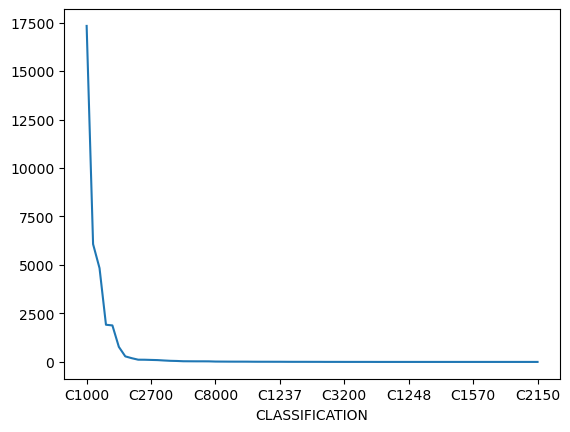

In [12]:
df.CLASSIFICATION.value_counts().plot()

In [13]:
# You may find it helpful to look at CLASSIFICATION value counts >1
temp = df.CLASSIFICATION.value_counts()
temp.loc[temp > 1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [15]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff = 100

temp = df.CLASSIFICATION.value_counts()
classifications_to_replace = list(temp.loc[temp < cutoff].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
df['CLASSIFICATION'].value_counts()

NameError: name 'application_df' is not defined

In [16]:
# Convert categorical data to numeric with `pd.get_dummies`
pd.get_dummies(df, dtype=int)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C0,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1230,CLASSIFICATION_C1234,CLASSIFICATION_C1235,CLASSIFICATION_C1236,CLASSIFICATION_C1237,CLASSIFICATION_C1238,CLASSIFICATION_C1240,CLASSIFICATION_C1245,CLASSIFICATION_C1246,CLASSIFICATION_C1248,CLASSIFICATION_C1250,CLASSIFICATION_C1256,CLASSIFICATION_C1257,CLASSIFICATION_C1260,CLASSIFICATION_C1267,CLASSIFICATION_C1270,CLASSIFICATION_C1278,CLASSIFICATION_C1280,CLASSIFICATION_C1283,CLASSIFICATION_C1300,CLASSIFICATION_C1370,CLASSIFICATION_C1400,CLASSIFICATION_C1500,CLASSIFICATION_C1570,CLASSIFICATION_C1580,CLASSIFICATION_C1600,CLASSIFICATION_C1700,CLASSIFICATION_C1720,CLASSIFICATION_C1728,CLASSIFICATION_C1732,CLASSIFICATION_C1800,CLASSIFICATION_C1820,CLASSIFICATION_C1900,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C2150,CLASSIFICATION_C2170,CLASSIFICATION_C2190,CLASSIFICATION_C2300,CLASSIFICATION_C2380,CLASSIFICATION_C2400,CLASSIFICATION_C2500,CLASSIFICATION_C2561,CLASSIFICATION_C2570,CLASSIFICATION_C2600,CLASSIFICATION_C2700,CLASSIFICATION_C2710,CLASSIFICATION_C2800,CLASSIFICATION_C3000,CLASSIFICATION_C3200,CLASSIFICATION_C3700,CLASSIFICATION_C4000,CLASSIFICATION_C4100,CLASSIFICATION_C4120,CLASSIFICATION_C4200,CLASSIFICATION_C4500,CLASSIFICATION_C5000,CLASSIFICATION_C5200,CLASSIFICATION_C6000,CLASSIFICATION_C6100,CLASSIFICATION_C7000,CLASSIFICATION_C7100,CLASSIFICATION_C7120,CLASSIFICATION_C7200,CLASSIFICATION_C7210,CLASSIFICATION_C8000,CLASSIFICATION_C8200,CLASSIFICATION_C8210,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [17]:
# Label (Ordinal Encode) SPECIAL_CONSIDERATIONS
df["SPECIAL_CONSIDERATIONS"] = df["SPECIAL_CONSIDERATIONS"].map({"N": 0, "Y": 1})

In [18]:
# One Hot Encode
df_encoded = pd.get_dummies(df, dtype=int)
df_encoded.head()

,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C0,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1230,CLASSIFICATION_C1234,CLASSIFICATION_C1235,CLASSIFICATION_C1236,CLASSIFICATION_C1237,CLASSIFICATION_C1238,CLASSIFICATION_C1240,CLASSIFICATION_C1245,CLASSIFICATION_C1246,CLASSIFICATION_C1248,CLASSIFICATION_C1250,CLASSIFICATION_C1256,CLASSIFICATION_C1257,CLASSIFICATION_C1260,CLASSIFICATION_C1267,CLASSIFICATION_C1270,CLASSIFICATION_C1278,CLASSIFICATION_C1280,CLASSIFICATION_C1283,CLASSIFICATION_C1300,CLASSIFICATION_C1370,CLASSIFICATION_C1400,CLASSIFICATION_C1500,CLASSIFICATION_C1570,CLASSIFICATION_C1580,CLASSIFICATION_C1600,CLASSIFICATION_C1700,CLASSIFICATION_C1720,CLASSIFICATION_C1728,CLASSIFICATION_C1732,CLASSIFICATION_C1800,CLASSIFICATION_C1820,CLASSIFICATION_C1900,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C2150,CLASSIFICATION_C2170,CLASSIFICATION_C2190,CLASSIFICATION_C2300,CLASSIFICATION_C2380,CLASSIFICATION_C2400,CLASSIFICATION_C2500,CLASSIFICATION_C2561,CLASSIFICATION_C2570,CLASSIFICATION_C2600,CLASSIFICATION_C2700,CLASSIFICATION_C2710,CLASSIFICATION_C2800,CLASSIFICATION_C3000,CLASSIFICATION_C3200,CLASSIFICATION_C3700,CLASSIFICATION_C4000,CLASSIFICATION_C4100,CLASSIFICATION_C4120,CLASSIFICATION_C4200,CLASSIFICATION_C4500,CLASSIFICATION_C5000,CLASSIFICATION_C5200,CLASSIFICATION_C6000,CLASSIFICATION_C6100,CLASSIFICATION_C7000,CLASSIFICATION_C7100,CLASSIFICATION_C7120,CLASSIFICATION_C7200,CLASSIFICATION_C7210,CLASSIFICATION_C8000,CLASSIFICATION_C8200,CLASSIFICATION_C8210,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,0,5000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,108590,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,1,0,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,6692,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,1,0,142590,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


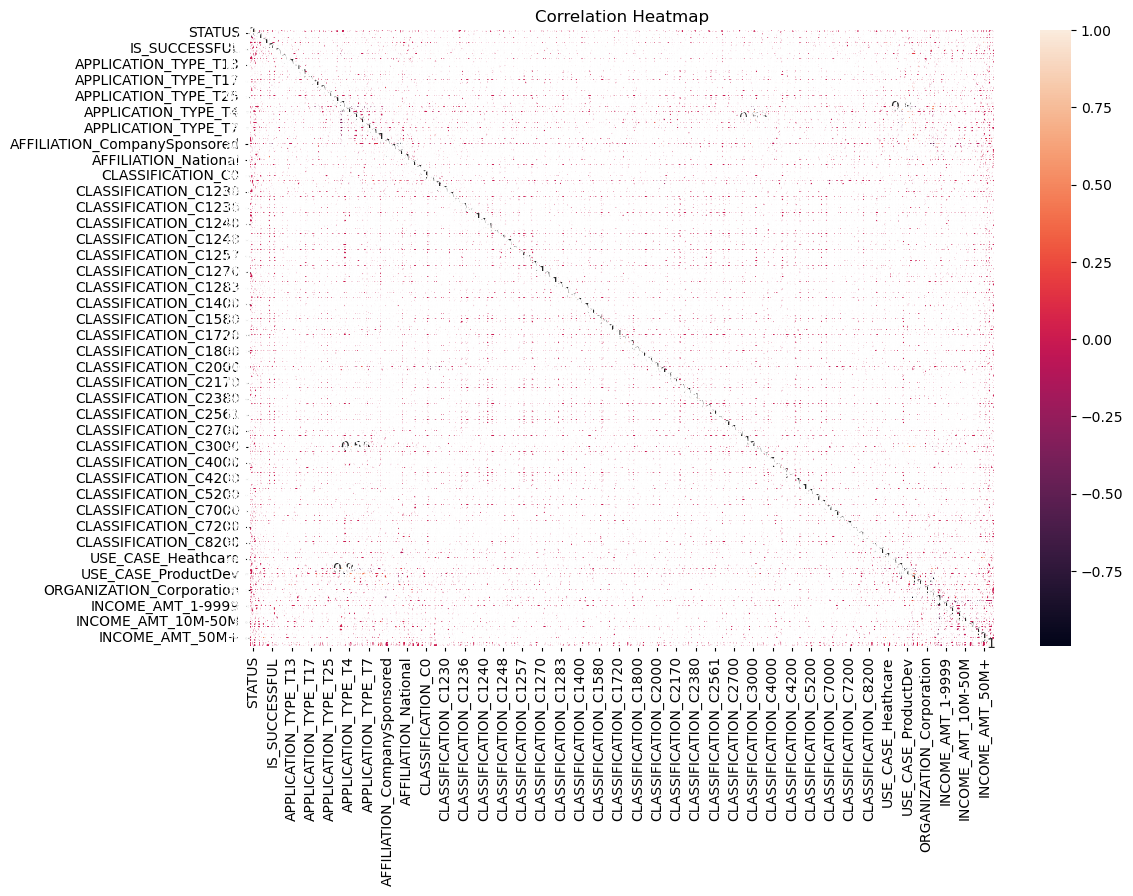

In [19]:
corrs = df_encoded.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corrs, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
abs(corrs.IS_SUCCESSFUL).sort_values(ascending=False)

IS_SUCCESSFUL                   1.000000
AFFILIATION_CompanySponsored    0.369379
AFFILIATION_Independent         0.368322
ORGANIZATION_Association        0.179561
ORGANIZATION_Trust              0.162164
                                  ...   
APPLICATION_TYPE_T2             0.001303
APPLICATION_TYPE_T3             0.000953
CLASSIFICATION_C1267            0.000496
CLASSIFICATION_C3200            0.000496
CLASSIFICATION_C2000            0.000434
Name: IS_SUCCESSFUL, Length: 116, dtype: float64

In [21]:
df.IS_SUCCESSFUL.value_counts()

IS_SUCCESSFUL
1    18261
0    16038
Name: count, dtype: int64

In [22]:
# Split our preprocessed data into our features and target arrays
X = df_encoded.drop(['IS_SUCCESSFUL'], axis=1)
y = df_encoded['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42, stratify=y)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(34299, 115)
(25724, 115)
(8575, 115)


In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled.head()

,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C0,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1230,CLASSIFICATION_C1234,CLASSIFICATION_C1235,CLASSIFICATION_C1236,CLASSIFICATION_C1237,CLASSIFICATION_C1238,CLASSIFICATION_C1240,CLASSIFICATION_C1245,CLASSIFICATION_C1246,CLASSIFICATION_C1248,CLASSIFICATION_C1250,CLASSIFICATION_C1256,CLASSIFICATION_C1257,CLASSIFICATION_C1260,CLASSIFICATION_C1267,CLASSIFICATION_C1270,CLASSIFICATION_C1278,CLASSIFICATION_C1280,CLASSIFICATION_C1283,CLASSIFICATION_C1300,CLASSIFICATION_C1370,CLASSIFICATION_C1400,CLASSIFICATION_C1500,CLASSIFICATION_C1570,CLASSIFICATION_C1580,CLASSIFICATION_C1600,CLASSIFICATION_C1700,CLASSIFICATION_C1720,CLASSIFICATION_C1728,CLASSIFICATION_C1732,CLASSIFICATION_C1800,CLASSIFICATION_C1820,CLASSIFICATION_C1900,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C2150,CLASSIFICATION_C2170,CLASSIFICATION_C2190,CLASSIFICATION_C2300,CLASSIFICATION_C2380,CLASSIFICATION_C2400,CLASSIFICATION_C2500,CLASSIFICATION_C2561,CLASSIFICATION_C2570,CLASSIFICATION_C2600,CLASSIFICATION_C2700,CLASSIFICATION_C2710,CLASSIFICATION_C2800,CLASSIFICATION_C3000,CLASSIFICATION_C3200,CLASSIFICATION_C3700,CLASSIFICATION_C4000,CLASSIFICATION_C4100,CLASSIFICATION_C4120,CLASSIFICATION_C4200,CLASSIFICATION_C4500,CLASSIFICATION_C5000,CLASSIFICATION_C5200,CLASSIFICATION_C6000,CLASSIFICATION_C6100,CLASSIFICATION_C7000,CLASSIFICATION_C7100,CLASSIFICATION_C7120,CLASSIFICATION_C7200,CLASSIFICATION_C7210,CLASSIFICATION_C8000,CLASSIFICATION_C8200,CLASSIFICATION_C8210,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0108,-0.029257,-0.032437,-0.126316,-0.028584,-0.042325,-0.0108,-0.008818,-0.006235,-0.179158,-0.021603,-0.008818,-0.008818,0.515517,-0.217996,-0.185194,-0.190627,-0.145738,-0.145877,-0.067012,-0.920214,-0.041393,0.926138,-0.03119,-0.012471,-0.018708,-0.008818,0.995423,-0.408517,-0.03119,-0.006235,-0.016498,-0.006235,-0.015274,-0.015274,-0.03119,-0.006235,-0.008818,-0.006235,-0.021603,-0.008818,-0.013943,0.0,-0.008818,-0.052236,-0.015274,-0.038967,-0.006235,-0.042325,-0.006235,-0.029915,-0.020683,-0.006235,0.0,-0.012471,-0.090506,-0.013943,-0.006235,-0.006235,-0.020683,0.0,-0.006235,-0.467020,-0.240452,-0.006235,0.0,-0.006235,-0.029915,-0.006235,-0.0108,-0.006235,-0.006235,-0.006235,-0.006235,-0.055854,-0.0108,-0.056203,-0.243154,-0.008818,-0.006235,-0.07607,-0.015274,-0.006235,0.0,-0.006235,-0.061523,-0.006235,-0.018708,0.0,-0.150128,-0.048352,-0.020683,-0.028584,-0.0108,-0.023335,-0.017638,-0.006235,-0.107338,-0.066128,-0.008818,0.466773,-0.441422,-0.649737,-0.121464,-0.03638,0.674520,-1.574944,-0.145459,-0.12552,-0.329838,-0.082045,-0.170539,2.866491,-0.063405,-0.074504
1,0.0108,-0.029257,-0.032533,-0.126316,-0.028584,-0.042325,-0.0108,-0.008818,-0.006235,-0.179158,-0.021603,-0.008818,-0.008818,0.515517,-0.217996,-0.185194,-0.190627,-0.145738,-0.145877,-0.067012,-0.920214,-0.041393,0.926138,-0.03119,-0.012471,-0.018708,-0.008818,-1.004598,-0.408517,-0.03119,-0.006235,-0.016498,-0.006235,-0.015274,-0.015274,-0.03119,-0.006235,-0.008818,-0.006235,-0.021603,-0.008818,-0.013943,0.0,-0.008818,-0.052236,-0.015274,-0.038967,-0.006235,-0.042325,-0.006235,-0.029915,-0.020683,-0.006235,0.0,-0.012

## Compile, Train and Evaluate the Model

In [30]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=3, activation="relu", input_dim=len(X.columns)))

# Second hidden layer
#  YOUR CODE GOES HERE

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

NameError: name 'tf' is not defined

In [25]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

NameError: name 'nn_model' is not defined

In [26]:
# Train the model
fit_model = nn_model.fit(X_train, y_train, epochs=10) # lol

NameError: name 'nn_model' is not defined

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

NameError: name 'nn' is not defined

In [28]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train, y_train, epochs=10) 

NameError: name 'nn_model' is not defined

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

NameError: name 'nn_model' is not defined

In [31]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

NameError: name 'nn_model' is not defined

In [32]:
 # Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

NameError: name 'fit_model' is not defined

In [33]:
 # Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

NameError: name 'history_df' is not defined

In [34]:
def doClassification_NN(nn_model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = nn_model.predict(X_train)
    train_preds = tf.greater(train_preds, .5)
    train_proba = nn_model.predict(X_train)

    test_preds = nn_model.predict(X_test)
    test_preds = tf.greater(test_preds, .5)
    test_proba = nn_model.predict(X_test)

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)

    train_results = f"""TRAIN METRICS
    Confusion Matrix:
    {train_cf}

    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """

    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)

    test_results = f"""TEST METRICS
    Confusion Matrix:
    {test_cf}

    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """

    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)

    # Set figure size
    plt.figure(figsize=(6, 6))

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")

    # Display the plot
    plt.show()

In [35]:
 doClassification_NN(nn_model, X_train, X_test, y_train, y_test)

NameError: name 'nn_model' is not defined

In [36]:
18261 / len(df)

0.5324061926003674

In [38]:
# Export our model to HDF5 file
nn_model.save('my_model.keras')

NameError: name 'nn_model' is not defined